In [1]:
# Load Numpy package
# Load Pandas package
# Load MatPlotLib package
# Load Seaborn package

import glob
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data used within this case study was retrieved from the following link: https://www.kaggle.com/datasets/knightbearr/sales-product-data

In [18]:
# Create a list for all the file names that are the CSV files we want to combine
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))]

# Combine the files within the list
complete_file = pd.concat([pd.read_csv(f) for f in filenames])

# Export the complete file into a CSV file
complete_file.to_csv('complete_raw_data.csv', index=False)

In [2]:
# Import the complete CSV file
df = pd.read_csv('complete_raw_data.csv')

# Briefly view the concatenated dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# Check for missing values
df.isnull()
df.isnull().sum()

# Drop rows in which contain missing values
df = df.dropna()

In [4]:
# Separate the address information in the Purchase Address column into individual columns
df = df.join(df['Purchase Address'].str.split(',', expand=True).rename(columns={0:'Street', 1:'City',2:'State-Zip'}))
df = df.join(df['State-Zip'].str.split(' ', expand=True).rename(columns={0:'1', 1:'State', 2:'Zip'}))

# Drop the unneccesary columns created
df = df.drop(columns=['State-Zip', '1'])

In [5]:
# Separate the date time information in the Order Date column into individual columns
df['Order Date'] = pd.to_datetime(df['Order Date'], errors = 'coerce')

df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Day'] = pd.to_datetime(df['Order Date']).dt.day
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Time'] = pd.to_datetime(df['Order Date']).dt.time

In [6]:
# Check the data types for each column
print(df.dtypes)

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Street                      object
City                        object
State                       object
Zip                         object
Month                      float64
Day                        float64
Year                       float64
Time                        object
dtype: object


In [7]:
# Convert columns into their correct data types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors = 'coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors = 'coerce')
#print(df.dtypes)

In [8]:
# Calculate the total sale of each order
total_sales = df['Quantity Ordered']*df['Price Each']
df.insert(4, 'Total Sale', total_sales)

In [9]:
# Check each individual column and its assortment of values
#print(df['Order ID'].value_counts())
#print(df['Product'].value_counts())
#print(df['Street'].value_counts())
#print(df['City'].value_counts())
#print(df['State'].value_counts())
#print(df['Zip'].value_counts())
#print(df['Month'].value_counts())
#print(df['Day'].value_counts())
#print(df['Year'].value_counts())
# Drop rows where Year was 2020 since we want to only look at 2019
df.drop(df.loc[df['Year']==2020].index, inplace=True)

In [10]:
# Check general descriptive statistics for columns 
df_stats = df.describe(include=[np.number])
df_stats

,Quantity Ordered,Price Each,Total Sale,Month,Day,Year
count,185916.000000,185916.000000,185916.000000,185916.000000,185916.000000,185916.0
mean,1.124368,184.387720,185.478203,7.060248,15.762231,2019.0
std,0.442749,332.722426,332.911130,3.502358,8.780711,0.0
min,1.000000,2.990000,2.990000,1.000000,1.000000,2019.0
25%,1.000000,11.950000,11.950000,4.000000,8.000000,2019.0
50%,1.000000,14.950000,14.950000,7.000000,16.000000,2019.0
75%,1.000000,150.000000,150.000000,10.000000,23.000000,2019.0
max,9.000000,1700.000000,3400.000000,12.000000,31.000000,2019.0


In [11]:
# Calculate the total items sold in 2019
total_items_sold = df['Quantity Ordered'].sum()
total_items_sold

209038.0

In [12]:
# Calculate the total items sold in each month
total_items_sold_monthly = df.groupby('Month').agg({'Quantity Ordered':'sum'})
total_items_sold_monthly

,Quantity Ordered
Month,
1.0,10862.0
2.0,13449.0
3.0,17005.0
4.0,20558.0
5.0,18667.0
6.0,15253.0
7.0,16072.0
8.0,13448.0
9.0,13109.0


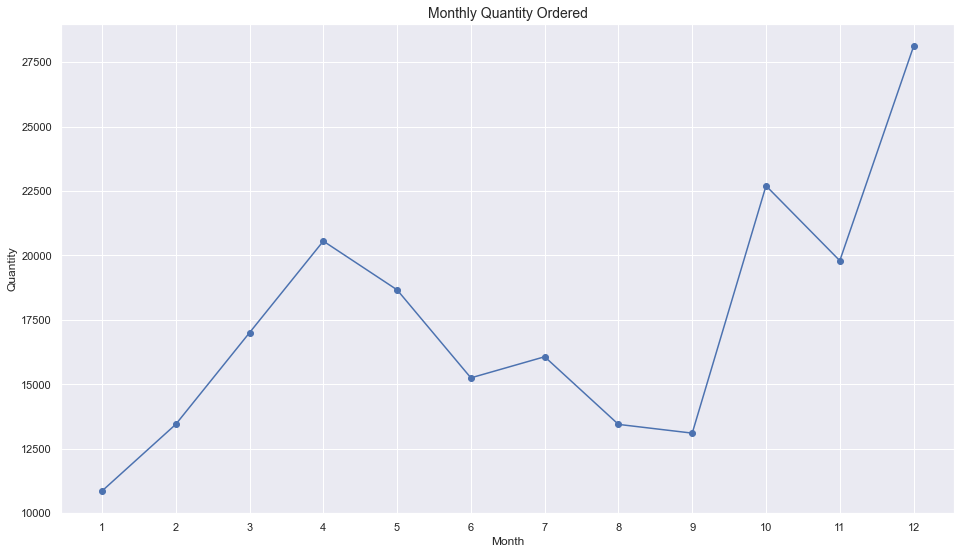

In [13]:
# Create a line graph for the items sold monthly 
sns.set_theme()
plt.figure(figsize=(16,9))

month = total_items_sold_monthly.index
quantity = total_items_sold_monthly.values

plt.plot(month, quantity, "-o")

plt.title('Monthly Quantity Ordered', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(range(1,13))
plt.ylabel('Quantity', fontsize=12)

plt.show()

In [14]:
# Calculate the total items of each product sold in 2019
# Sort the table by Quantity Ordered
# Drop the row containing 'Product'
total_products_sold = df.groupby('Product').agg({'Quantity Ordered':'sum'})
total_products_sold = total_products_sold.sort_values(by='Quantity Ordered', ascending=True)
total_products_sold = total_products_sold.drop('Product')
total_products_sold

,Quantity Ordered
Product,
LG Dryer,646.0
LG Washing Machine,666.0
Vareebadd Phone,2067.0
20in Monitor,4126.0
ThinkPad Laptop,4128.0
Macbook Pro Laptop,4727.0
Flatscreen TV,4818.0
Google Phone,5531.0
34in Ultrawide Monitor,6199.0


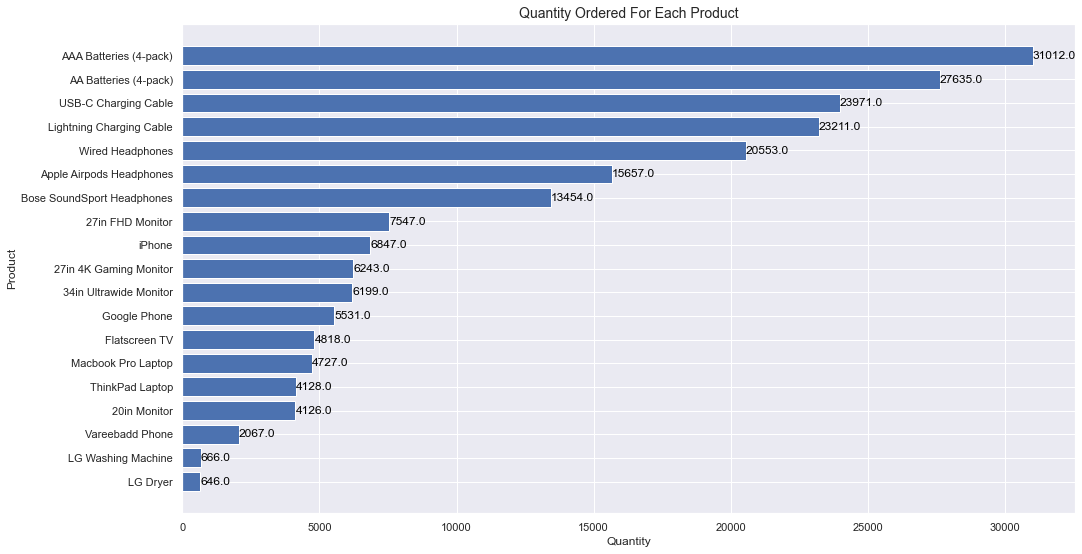

In [15]:
# Create a bar graph for the items sold monthly 
sns.set_theme()
plt.figure(figsize=(16,9))

product = total_products_sold.index
quantity = total_products_sold['Quantity Ordered']

plt.barh(product, quantity)

for i, v in enumerate(sorted(total_products_sold['Quantity Ordered'])):
    plt.text(v+0.2, i, str(round(v, 2)), color='black', va="center")

plt.title('Quantity Ordered For Each Product', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.show()

In [16]:
# Calculate the total sale for 2019
total_sales = df['Total Sale'].sum()
total_sales

34483365.67999999

In [17]:
# Calculate the total sale in each month
# Adjust Total Sale to be per million
total_sales_monthly = df.groupby('Month').agg({'Total Sale':'sum'})
total_sales_monthly['Total Sale'] = total_sales_monthly['Total Sale'] / 1000000
total_sales_monthly

,Total Sale
Month,
1.0,1.813586
2.0,2.202022
3.0,2.807100
4.0,3.390670
5.0,3.152607
6.0,2.577802
7.0,2.647776
8.0,2.244468
9.0,2.097560


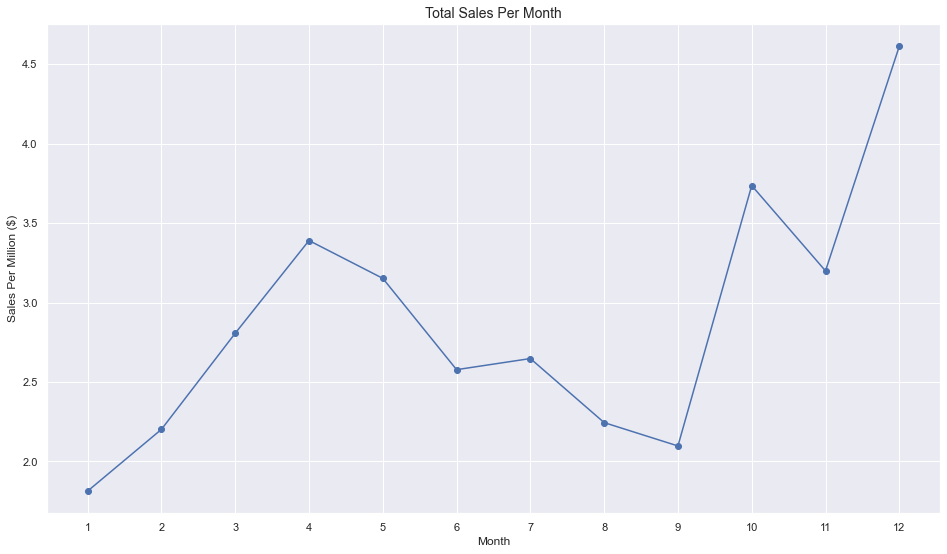

In [18]:
# Create a line graph for the total monthly sales 
sns.set_theme()
plt.figure(figsize=(16,9))

month = total_sales_monthly.index
sales = total_sales_monthly.values

plt.plot(month, sales, "-o")

plt.title('Total Sales Per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(range(1,13))
plt.ylabel('Sales Per Million ($)', fontsize=12)

plt.show()

In [19]:
# Calculate the total items sold in each city
# Sort the table by Quantity Ordered
total_items_sold_city = df.groupby('City').agg({'Quantity Ordered':'sum'})
total_items_sold_city = total_items_sold_city.sort_values(by='Quantity Ordered', ascending=True)
total_items_sold_city

,Quantity Ordered
City,
Austin,11151.0
Portland,14051.0
Seattle,16552.0
Atlanta,16602.0
Dallas,16728.0
Boston,22524.0
New York City,27916.0
Los Angeles,33288.0
San Francisco,50226.0


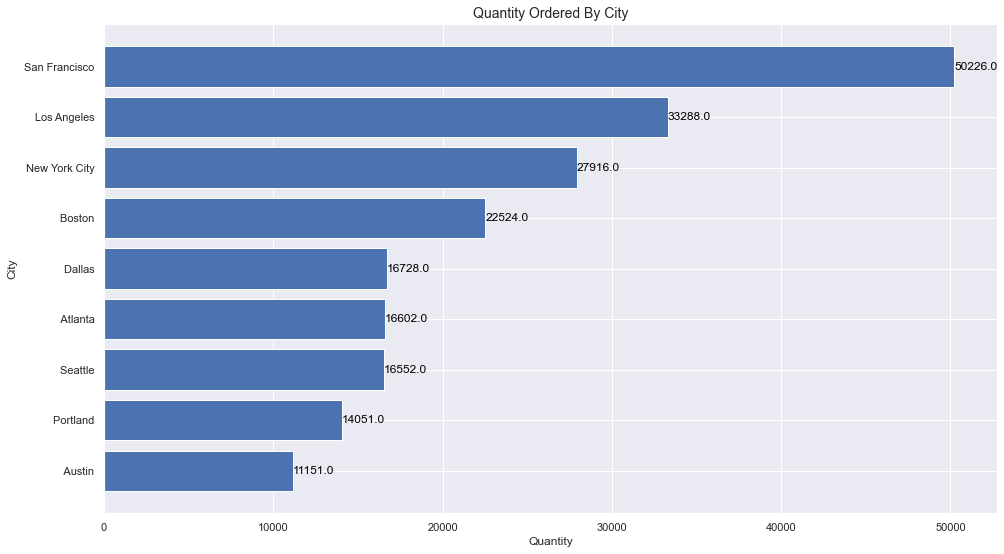

In [20]:
# Create a bar graph for the number of items sold in each city
sns.set_theme()
plt.figure(figsize=(16,9))

product = total_items_sold_city.index
quantity = total_items_sold_city['Quantity Ordered']

plt.barh(product, quantity)

for i, v in enumerate(sorted(total_items_sold_city['Quantity Ordered'])):
    plt.text(v+0.2, i, str(round(v, 2)), color='black', va="center")

plt.title('Quantity Ordered By City', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('City', fontsize=12)

plt.show()

In [21]:
# Calculate the total sale in each city
# Sort the table by Total Sale
total_sales_city = df.groupby('City').agg({'Total Sale':'sum'})
total_sales_city['Total Sale'] = total_sales_city['Total Sale'] / 1000000
total_sales_city = total_sales_city.sort_values(by='Total Sale', ascending=True)
total_sales_city

,Total Sale
City,
Austin,1.819082
Portland,2.320338
Seattle,2.747605
Dallas,2.766260
Atlanta,2.795499
Boston,3.660315
New York City,4.662977
Los Angeles,5.451571
San Francisco,8.259719


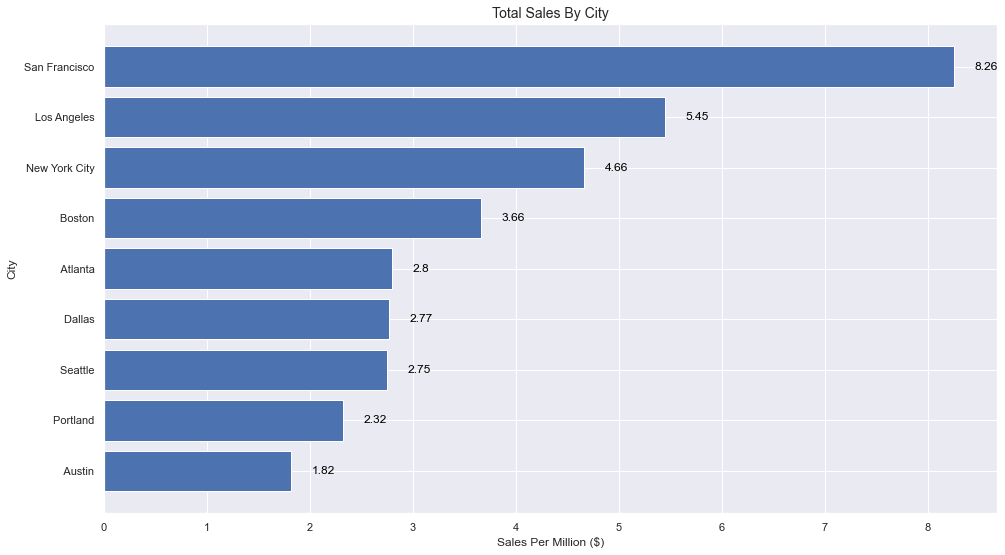

In [22]:
# Create a bar graph for the total sale in each city
sns.set_theme()
plt.figure(figsize=(16,9))

city = total_sales_city.index
sales = total_sales_city['Total Sale']

plt.barh(city, sales)

for i, v in enumerate(sorted(total_sales_city['Total Sale'])):
    plt.text(v+0.2, i, str(round(v, 2)), color='black', va="center")

plt.title('Total Sales By City', fontsize=14)
plt.xlabel('Sales Per Million ($)', fontsize=12)
plt.ylabel('City', fontsize=12)

plt.show()

In [23]:
# Combine the Products bought together within each specific Order ID

conc_df = df.groupby('Order ID').agg({'Product': ', '.join})
conc_df = conc_df.drop('Order ID')
conc_df

,Product
Order ID,
141234,iPhone
141235,Lightning Charging Cable
141236,Wired Headphones
141237,27in FHD Monitor
141238,Wired Headphones
...,...
319666,Lightning Charging Cable
319667,AA Batteries (4-pack)
319668,Vareebadd Phone


In [24]:
# Count the number of different combinations 

from itertools import combinations
from collections import Counter

count = Counter()
for product in conc_df['Product']:
    product_list = product.split(', ')
    count.update(Counter(combinations(product_list, 2)))

for key, value in count.most_common(15):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58


Text(0, 0.5, 'Items')

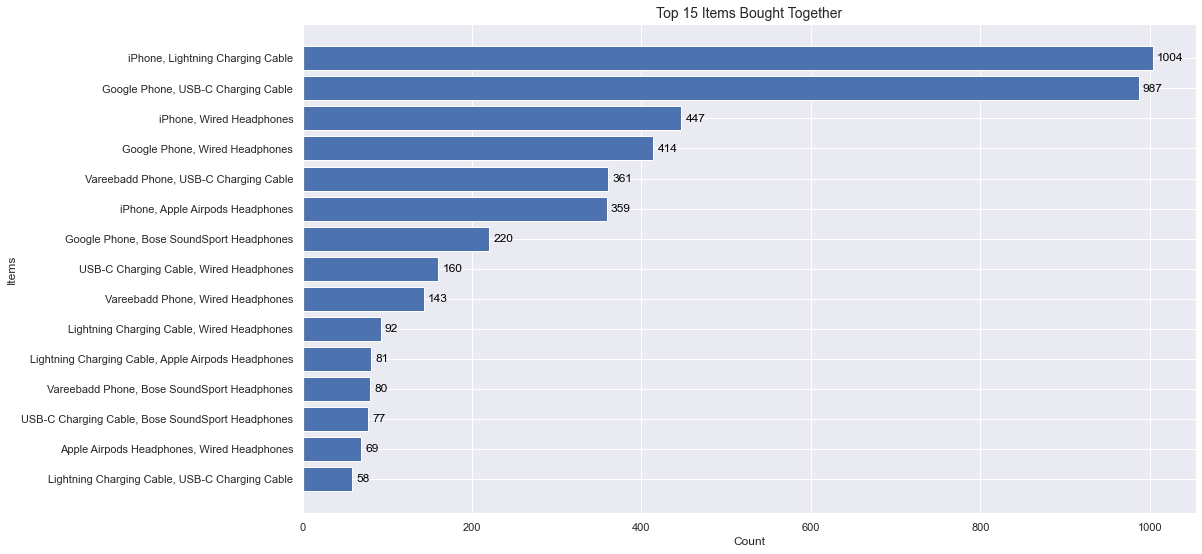

In [46]:
# Create a bar graph for the most frequent items bought together

top_items = count.most_common(15)
top_items.reverse()
grouped_items = [', '.join(pair) for pair, count in top_items]
values = [count for pair, count in top_items]

sns.set_theme()
plt.figure(figsize=(16,9))

plt.barh(grouped_items, values)

for i, v in enumerate(sorted(values)):
    plt.text(v+5, i, str(round(v, 2)), color='black', va="center")
    
plt.title('Top 15 Items Bought Together', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Items', fontsize=12)